## News Sentiment Analysis using News Abstract

In [ ]:
#STEP 0 - Making all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from google.colab import files


In [6]:
from google.colab import files
uploaded = files.upload()

df=pd.read_csv('all_data.csv', encoding = "ISO-8859-1")

In [35]:
#STEP 1 - Data Exploration
#Identifying number of rows and columns
#Identifying shape of the data
#Identifying size of the data

In [74]:
#Identifying df.head()
df.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,subsection_name,byline,type_of_material,_id,word_count,uri
0,The tentative deal for the menâs golf circui...,https://www.nytimes.com/2023/12/31/business/de...,The tentative deal for the menâs golf circui...,When the PGA Tour and the upstart LIV Golf lea...,B,6.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'PGA Tour and Saudi-Backed LIV Extend...,"[{'name': 'subject', 'value': 'Golf', 'rank': ...",2024-01-01T00:25:32+0000,article,Business,Business Day,DealBook,"{'original': 'By Lauren Hirsch', 'person': [{'...",News,nyt://article/0b16df62-9eba-5e67-a6dd-ae457d13...,558,nyt://article/0b16df62-9eba-5e67-a6dd-ae457d13...
1,Harry Zheng makes his New York Times debut.,https://www.nytimes.com/2023/12/31/crosswords/...,Harry Zheng makes his New York Times debut.,Jump to: Todayâs Theme | Tricky Clues,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Something to Whistle', 'kicker': 'wo...","[{'name': 'subject', 'value': 'Crossword Puzzl...",2024-01-01T00:32:06+0000,article,Games,Crosswords & Games,NaN,"{'original': 'By Sam Corbin', 'person': [{'fir...",News,nyt://article/e78e4da6-d5b5-5636-a0c2-1b13e62c...,855,nyt://article/e78e4da6-d5b5-5636-a0c2-1b13e62c...
2,Iranian-backed Houthi gunmen from Yemen had fi...,https://www.nytimes.com/2023/12/31/world/middl...,Iranian-backed Houthi gunmen from Yemen had fi...,A clash between Iranian-backed Houthi fighters...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'U.S. Helicopters Sink 3 Houthi Boats...,"[{'name': 'subject', 'value': 'Israel-Gaza War...",2024-01-01T00:53:23+0000,article,Foreign,World,Middle East,"{'original': 'By David E. Sanger, Eric Schmitt...",News,nyt://article/2b16c6ee-54aa-593c-a6cb-89d41421...,1218,nyt://article/2b16c6ee-54aa-593c-a6cb-89d41421...
3,New Yearâs celebrations took place as protes...,https://www.nytimes.com/2023/12/31/nyregion/ti...,New Yearâs celebrations took place as protes...,Hundreds of thousands of people crowded into T...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'In Times Square, Hundreds of Thousan...","[{'name': 'subject', 'value': 'New Year', 'ran...",2024-01-01T02:09:45+0000,article,Metro,New York,NaN,"{'original': 'By Andy Newman, Camille Baker an...",News,nyt://article/814aee78-1ecc-580f-9294-21f66832...,608,nyt://article/814aee78-1ecc-580f-9294-21f66832...
4,"Quotation of the Day for Monday, January 1, 2024.",https://www.nytimes.com/2023/12/31/pageoneplus...,"Quotation of the Day for Monday, January 1, 2024.","âIt feels fun, a religious Jew being friends...",A,2.0,The New York Times,[],{'main': 'Quotation of the Day: In a Jewish-Ar...,[],2024-01-01T03:59:09+0000,article,Summary,Corrections,NaN,"{'original': '', 'person': [], 'organization':...",Quote,nyt://article/66b6b6a7-c436-5ab9-9318-b2bb3cbe...,36,nyt://article/66b6b6a7-c436-5ab9-9318-b2bb3cbe...


In [75]:
#Number of rows and columns
rows, columns = df.shape
print("Number of rows: ", rows)
print("Number of columns: ", columns)

Number of rows:  23887
Number of columns:  20


In [76]:
#Identifying the size of the data
size = df.size
print("This is the the size of the data: ", size)

This is the the size of the data:  477740


In [77]:
#Listing the number and names of features
features = df.columns.tolist()
print("Number of features: ", len(features))
print("Features: ", features)

Number of features:  20
Features:  ['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'subsection_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri']


In [78]:
#Ordering the features alphabetically
features.sort()
print("Features in alphabetical order: ", features)



Features in alphabetical order:  ['_id', 'abstract', 'byline', 'document_type', 'headline', 'keywords', 'lead_paragraph', 'multimedia', 'news_desk', 'print_page', 'print_section', 'pub_date', 'section_name', 'snippet', 'source', 'subsection_name', 'type_of_material', 'uri', 'web_url', 'word_count']


In [79]:
#Finding the datatypes in data
data_types = df.dtypes
print("Data types: ", data_types)

Data types:  abstract             object
web_url              object
snippet              object
lead_paragraph       object
print_section        object
print_page          float64
source               object
multimedia           object
headline             object
keywords             object
pub_date             object
document_type        object
news_desk            object
section_name         object
subsection_name      object
byline               object
type_of_material     object
_id                  object
word_count            int64
uri                  object
dtype: object


In [80]:
#Information of the data
info = df.info()
print("Informatin of the data is: ", info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23887 entries, 0 to 23886
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   abstract          23879 non-null  object 
 1   web_url           23887 non-null  object 
 2   snippet           23805 non-null  object 
 3   lead_paragraph    23798 non-null  object 
 4   print_section     12796 non-null  object 
 5   print_page        12796 non-null  float64
 6   source            23887 non-null  object 
 7   multimedia        23887 non-null  object 
 8   headline          23887 non-null  object 
 9   keywords          23887 non-null  object 
 10  pub_date          23887 non-null  object 
 11  document_type     23887 non-null  object 
 12  news_desk         23423 non-null  object 
 13  section_name      23886 non-null  object 
 14  subsection_name   9646 non-null   object 
 15  byline            23887 non-null  object 
 16  type_of_material  23376 non-null  object

In [81]:
#STEP 2 - DATA PREPROCESSING
#Finding the missing values
#Finding the redundant values
#Replacing missing values using suitable method if needed


In [82]:
#Finding missing values
missing_values = df.isnull().sum()
print("The total number of missing values in data: ", missing_values)

The total number of missing values in data:  abstract                8
web_url                 0
snippet                82
lead_paragraph         89
print_section       11091
print_page          11091
source                  0
multimedia              0
headline                0
keywords                0
pub_date                0
document_type           0
news_desk             464
section_name            1
subsection_name     14241
byline                  0
type_of_material      511
_id                     0
word_count              0
uri                     0
dtype: int64


In [83]:
#Finding missing value in each
mv = df.isnull().any()
print(mv)

abstract             True
web_url             False
snippet              True
lead_paragraph       True
print_section        True
print_page           True
source              False
multimedia          False
headline            False
keywords            False
pub_date            False
document_type       False
news_desk            True
section_name         True
subsection_name      True
byline              False
type_of_material     True
_id                 False
word_count          False
uri                 False
dtype: bool


In [84]:
#Checking missing values
mv_2 = df.isnull().any().any()
print(mv_2)

True


In [85]:
#Checking the percentage of missing values of features to decide which features to drop and which to consider
percent = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values: ", percent)


Percentage of missing values:  abstract             0.033491
web_url              0.000000
snippet              0.343283
lead_paragraph       0.372588
print_section       46.431113
print_page          46.431113
source               0.000000
multimedia           0.000000
headline             0.000000
keywords             0.000000
pub_date             0.000000
document_type        0.000000
news_desk            1.942479
section_name         0.004186
subsection_name     59.618202
byline               0.000000
type_of_material     2.139239
_id                  0.000000
word_count           0.000000
uri                  0.000000
dtype: float64


In [86]:
#Listing the percent in descending order
percent = percent.sort_values(ascending=False)
print("The highest to lowest missing values are: ", percent)

The highest to lowest missing values are:  subsection_name     59.618202
print_section       46.431113
print_page          46.431113
type_of_material     2.139239
news_desk            1.942479
lead_paragraph       0.372588
snippet              0.343283
abstract             0.033491
section_name         0.004186
web_url              0.000000
source               0.000000
multimedia           0.000000
document_type        0.000000
pub_date             0.000000
keywords             0.000000
headline             0.000000
byline               0.000000
_id                  0.000000
word_count           0.000000
uri                  0.000000
dtype: float64


In [87]:
#Threshold - If column has more than 50% missing values dropping it entirely
dropped_features = percent[percent > 50]
print("Dropped features: ", dropped_features)

Dropped features:  subsection_name    59.618202
dtype: float64


In [88]:
#Fixing the missing values by adding data or replacing data
#Sincei it has both numerical and text data, the data is filled differently

#The text features
text_features = ['abstract', 'snippet', 'lead_paragraph', 'print_section',
             'source', 'headline', 'keywords', 'news_desk',
             'section_name', 'subsection_name', 'byline', 'type_of_material']

df[text_features] = df[text_features].fillna("Unknown")

In [89]:
#Replacing missing values of the features which have only numerical values
#The highest missing value percentage for the feature with numerical values only is print_page

#Filling the missing values with the median of the feature
numeric_cols = ['print_page']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [90]:
#Now chekcing the missing values after the replacement and fixing
missing_values = df.isnull().sum()
print("The total number of missing values in data: ", missing_values)

percent = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values: ", percent)




The total number of missing values in data:  abstract            0
web_url             0
snippet             0
lead_paragraph      0
print_section       0
print_page          0
source              0
multimedia          0
headline            0
keywords            0
pub_date            0
document_type       0
news_desk           0
section_name        0
subsection_name     0
byline              0
type_of_material    0
_id                 0
word_count          0
uri                 0
dtype: int64
Percentage of missing values:  abstract            0.0
web_url             0.0
snippet             0.0
lead_paragraph      0.0
print_section       0.0
print_page          0.0
source              0.0
multimedia          0.0
headline            0.0
keywords            0.0
pub_date            0.0
document_type       0.0
news_desk           0.0
section_name        0.0
subsection_name     0.0
byline              0.0
type_of_material    0.0
_id                 0.0
word_count          0.0
uri            

In [91]:
#Finding redundancy in data
#Checkign the number of duplicates
duplicates = df.duplicated().sum()
print("Number of duplicates in data: ", duplicates)

Number of duplicates in data:  0


In [92]:
#STEP 3 - Feature Comparison, selection and extraction
#Finding the relation of the features
#Finding which features are more relevant
#Selecting features by measuring the corelation coefficient

In [93]:
#Checking total number and list of features
print("Number of features: ", len(features))
print("Features: ", features)

Number of features:  20
Features:  ['_id', 'abstract', 'byline', 'document_type', 'headline', 'keywords', 'lead_paragraph', 'multimedia', 'news_desk', 'print_page', 'print_section', 'pub_date', 'section_name', 'snippet', 'source', 'subsection_name', 'type_of_material', 'uri', 'web_url', 'word_count']


In [94]:
#Checkign the corelation coefficient of the features
#Now since our data is mixed, it has numerical, cateogrical and text we need to use different methods
#Using TF-IDF to vectorize the text data

from sklearn.feature_extraction.text import TfidfVectorizer

texts = df[text_features]
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(texts.apply(lambda x: ' '.join(x), axis=1))
print(vectors)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2308953 stored elements and shape (23887, 62508)>
  Coords	Values
  (0, 55912)	0.07043531937201347
  (0, 55703)	0.14744016420220935
  (0, 14635)	0.1773605788496359
  (0, 21510)	0.045124842424681275
  (0, 35523)	0.17900431431042985
  (0, 23615)	0.4326913826893175
  (0, 11015)	0.26367072381770995
  (0, 56508)	0.0555297127115183
  (0, 29583)	0.16371799678172416
  (0, 21529)	0.10595032329037572
  (0, 24696)	0.054237160330307656
  (0, 14714)	0.18832347163648946
  (0, 663)	0.17795464328278837
  (0, 14616)	0.24848805283865613
  (0, 8788)	0.04641826667184003
  (0, 50996)	0.10448440503972148
  (0, 44686)	0.08931759045887552
  (0, 46268)	0.11403410119659275
  (0, 60823)	0.027192654427778584
  (0, 41972)	0.23465280853582612
  (0, 56853)	0.16123695263326795
  (0, 3057)	0.03788908896953021
  (0, 58882)	0.08178748589325119
  (0, 32777)	0.24536245767975357
  (0, 31934)	0.04968377308807167
  :	:
  (23886, 11981)	0.182177762398432
  (23886, 

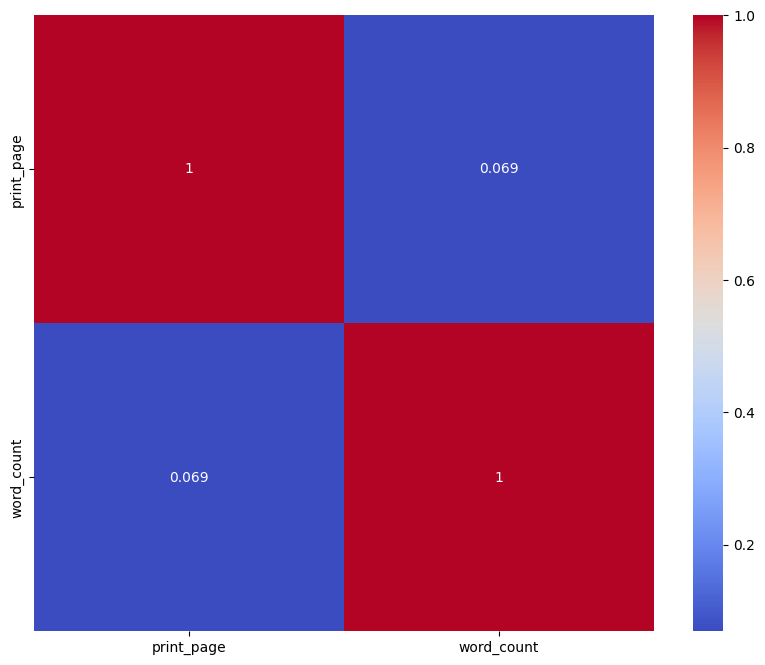

In [95]:
#Corelation matrix for numerical values
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include='number')

# Correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

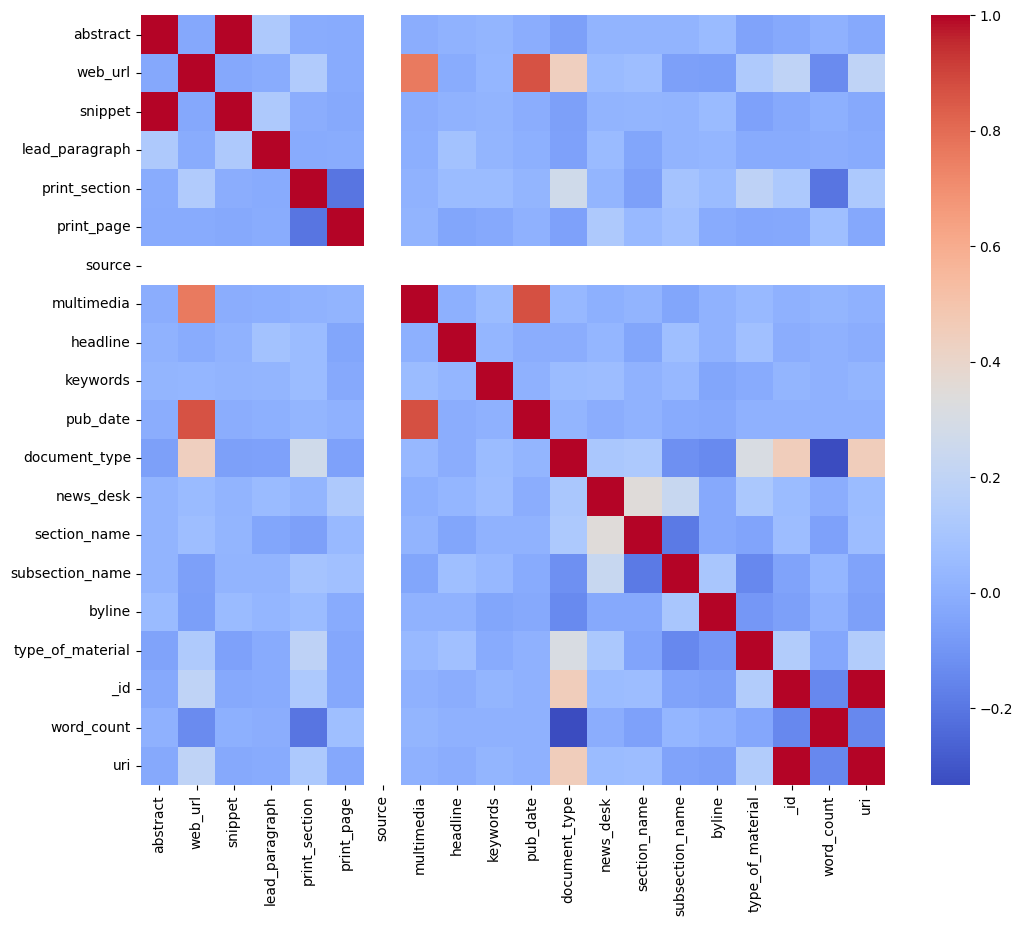

In [96]:
#Finding the correlation between features for categorical values
df_encoded = df.copy()

# Converting categorical columns to numerical codes
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Now correlation works
corr_all = df_encoded.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_all, annot=False, cmap='coolwarm')
plt.show()


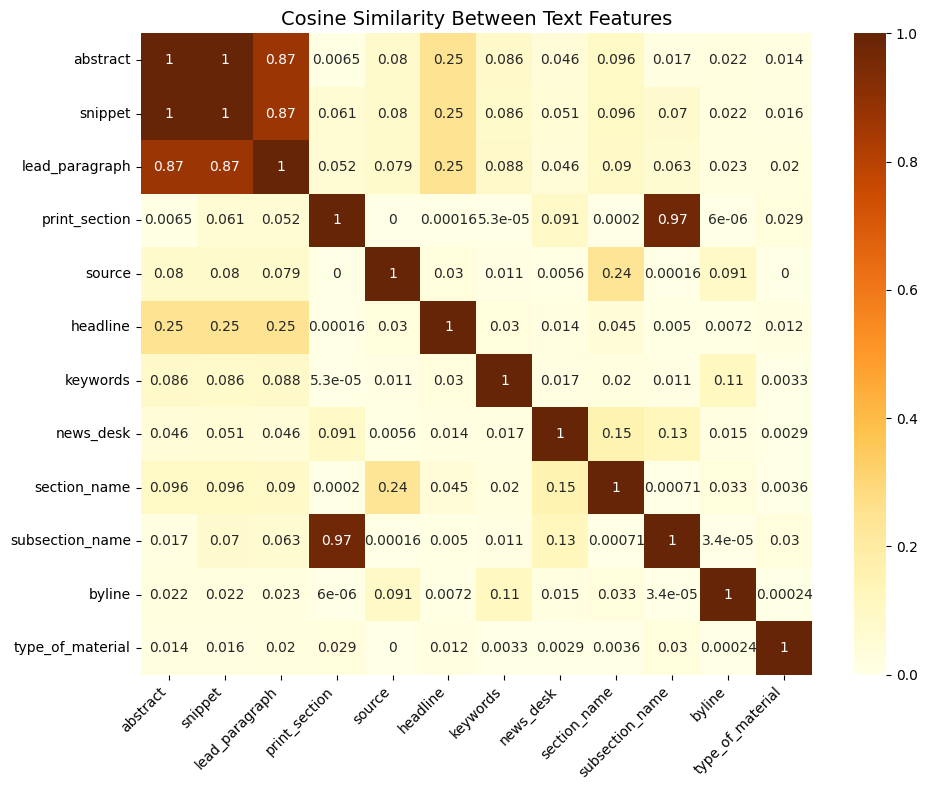

In [98]:
#Since most of our features are textual in nature, we will be using the methods used for text data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select text columns
text_columns = ['abstract', 'snippet', 'lead_paragraph', 'print_section',
                'source', 'headline', 'keywords', 'news_desk',
                'section_name', 'subsection_name', 'byline', 'type_of_material']

# Fill missing values and ensure all are strings
df_text = df[text_columns].fillna('').astype(str)

# Combine all text data for fitting the vectorizer
combined_text = df_text.apply(lambda x: ' '.join(x), axis=1)

# Create and fit a single TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english') # Removed max_features
vectorizer.fit(combined_text)

# Create TF-IDF vectors for each column using the fitted vectorizer
tfidf_vectors = {}
for col in text_columns:
    vec = vectorizer.transform(df_text[col])
    tfidf_vectors[col] = np.asarray(vec.mean(axis=0)).flatten()  # convert to 1D numpy array

# Stack all vectors (each row = one feature)
feature_matrix = np.vstack([tfidf_vectors[col] for col in text_columns])

# Compute cosine similarity between features
feature_similarity = cosine_similarity(feature_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(feature_similarity,
            xticklabels=text_columns,
            yticklabels=text_columns,
            annot=True,
            cmap='YlOrBr')
plt.title('Cosine Similarity Between Text Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [99]:
#FEATURE SELECTION
#Now that we have implemented three methods for checking feature relation
#Corelation for numerical values
#TF-IDF and cosine similarity for text features

#Setting a threshold
#Features which have similarity more than 60 percent

threshold = 0.6

redundant_features = set()
features = list(df_text.columns)

#Finding all the pairs of features which have a high similarity
for i in range(len(features)):
  for j in range(i+1, len(features)):
    sim_value = feature_similarity[i,j]
    if sim_value >= threshold:
      redundant_features.add(features[j])

#Creating final list of features which we will choose
final_feature_list = [f for f in features if f not in redundant_features]

print("Final features to keep: ", final_feature_list)

Final features to keep:  ['abstract', 'print_section', 'source', 'headline', 'keywords', 'news_desk', 'section_name', 'byline', 'type_of_material']


In [100]:
#STEP 5 - MODEL SELECTION AND INITIAL CLASSIFICATION
#Model selected is randomforestclassifier to just check the initial classification and compare it with different train test ratios



In [101]:
#Final cleaning
#Removing punctuations
# Converting all to lowercase

final_features = ['abstract', 'print_section', 'source', 'headline', 'keywords',
                  'news_desk', 'section_name', 'byline', 'type_of_material']

# Convert to lowercase
df[final_features] = df[final_features].apply(lambda x: x.str.lower())

# Remove punctuation using regex (use raw string 'r' to avoid invalid escape warning)
df[final_features] = df[final_features].apply(lambda x: x.str.replace(r'[^\w\s]', '', regex=True))



In [102]:
#Now got the api data from the same data and generates randomforestclassiifer for the following

In [8]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('api_data.csv', encoding = "ISO-8859-1")

Saving api_data.csv to api_data (1).csv


In [9]:
train = df[:12000]
test = df[3766:]

In [10]:
#Taking only abstract features first
abstracts = []
for row in range(0,len(train.index)): # Changed data.index to train.index
    abstracts.append(' '.join(str(x) for x in data.iloc[row,0:1]))

In [11]:
abstracts[0]

'The tentative deal for the menâ\x80\x99s golf circuits to join forces had a Dec. 31 deadline, but significant questions remained.'